# 🛩 Airline Analysis

In this project, I'll take on the role of a Data Scientist that works for a travel agency and needs to know the ins and outs of airline prices for our clients. I want to make sure that I can find the best deal for our clients and help them to understand how airline prices change based on different factors.

I will look into my favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, I'll explore a dataset for the first time and get to know each of the features. The goal is simply to explore and get to know the data using whatever methods come to mind.

## Loading Data & Data Summary

In [2]:
import pandas as pd
import numpy as np

# Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head(10))

# data summary
print(f'Shape of the dataframe = {flight.shape}')
print(f'The dataset has {flight.shape[0]} rows and {flight.shape[1]} columns')

# Checking for any null values
col_is_null = flight.isnull().sum()
print(f'Columns with their corresponding count of null values: {col_is_null}')
# No null values found

# Checking data type of every column
print(flight.dtypes)

# Checking the 7 point stats for the dataset
flight.describe()

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   
5   2076         196      0           Yes                    Yes   
6   1100         214      0            No                    Yes   
7   2012         200      0           Yes                    Yes   
8   1055         203      0            No                    Yes   
9   1123         204      0            No                     No   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No     

,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


In [3]:
# The mean of the miles is higher than the median while Passengers, Delay, First Class Price and Hours are below the median.

# These features, prima facie, seem to have outliers

## Uni-variate Analysis

We are going to look at individual variables for a better inspection

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?
   
2. What do coach ticket prices for flights over 8 hrs long look like? What are the high, low, and average prices for 8-hour-long flights? Does a \$500 ticket seem more reasonable than before?
   
3. How are flight delay times distributed? Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

__Note__: From the `.describe()` results, delays have a median of 13 mins, with a maximum of 1560 mins, which is an extreme outlier and disorients our plot. We can look at a delay plot with delays < 500 mins. Check the delay boxplot to see the outliers

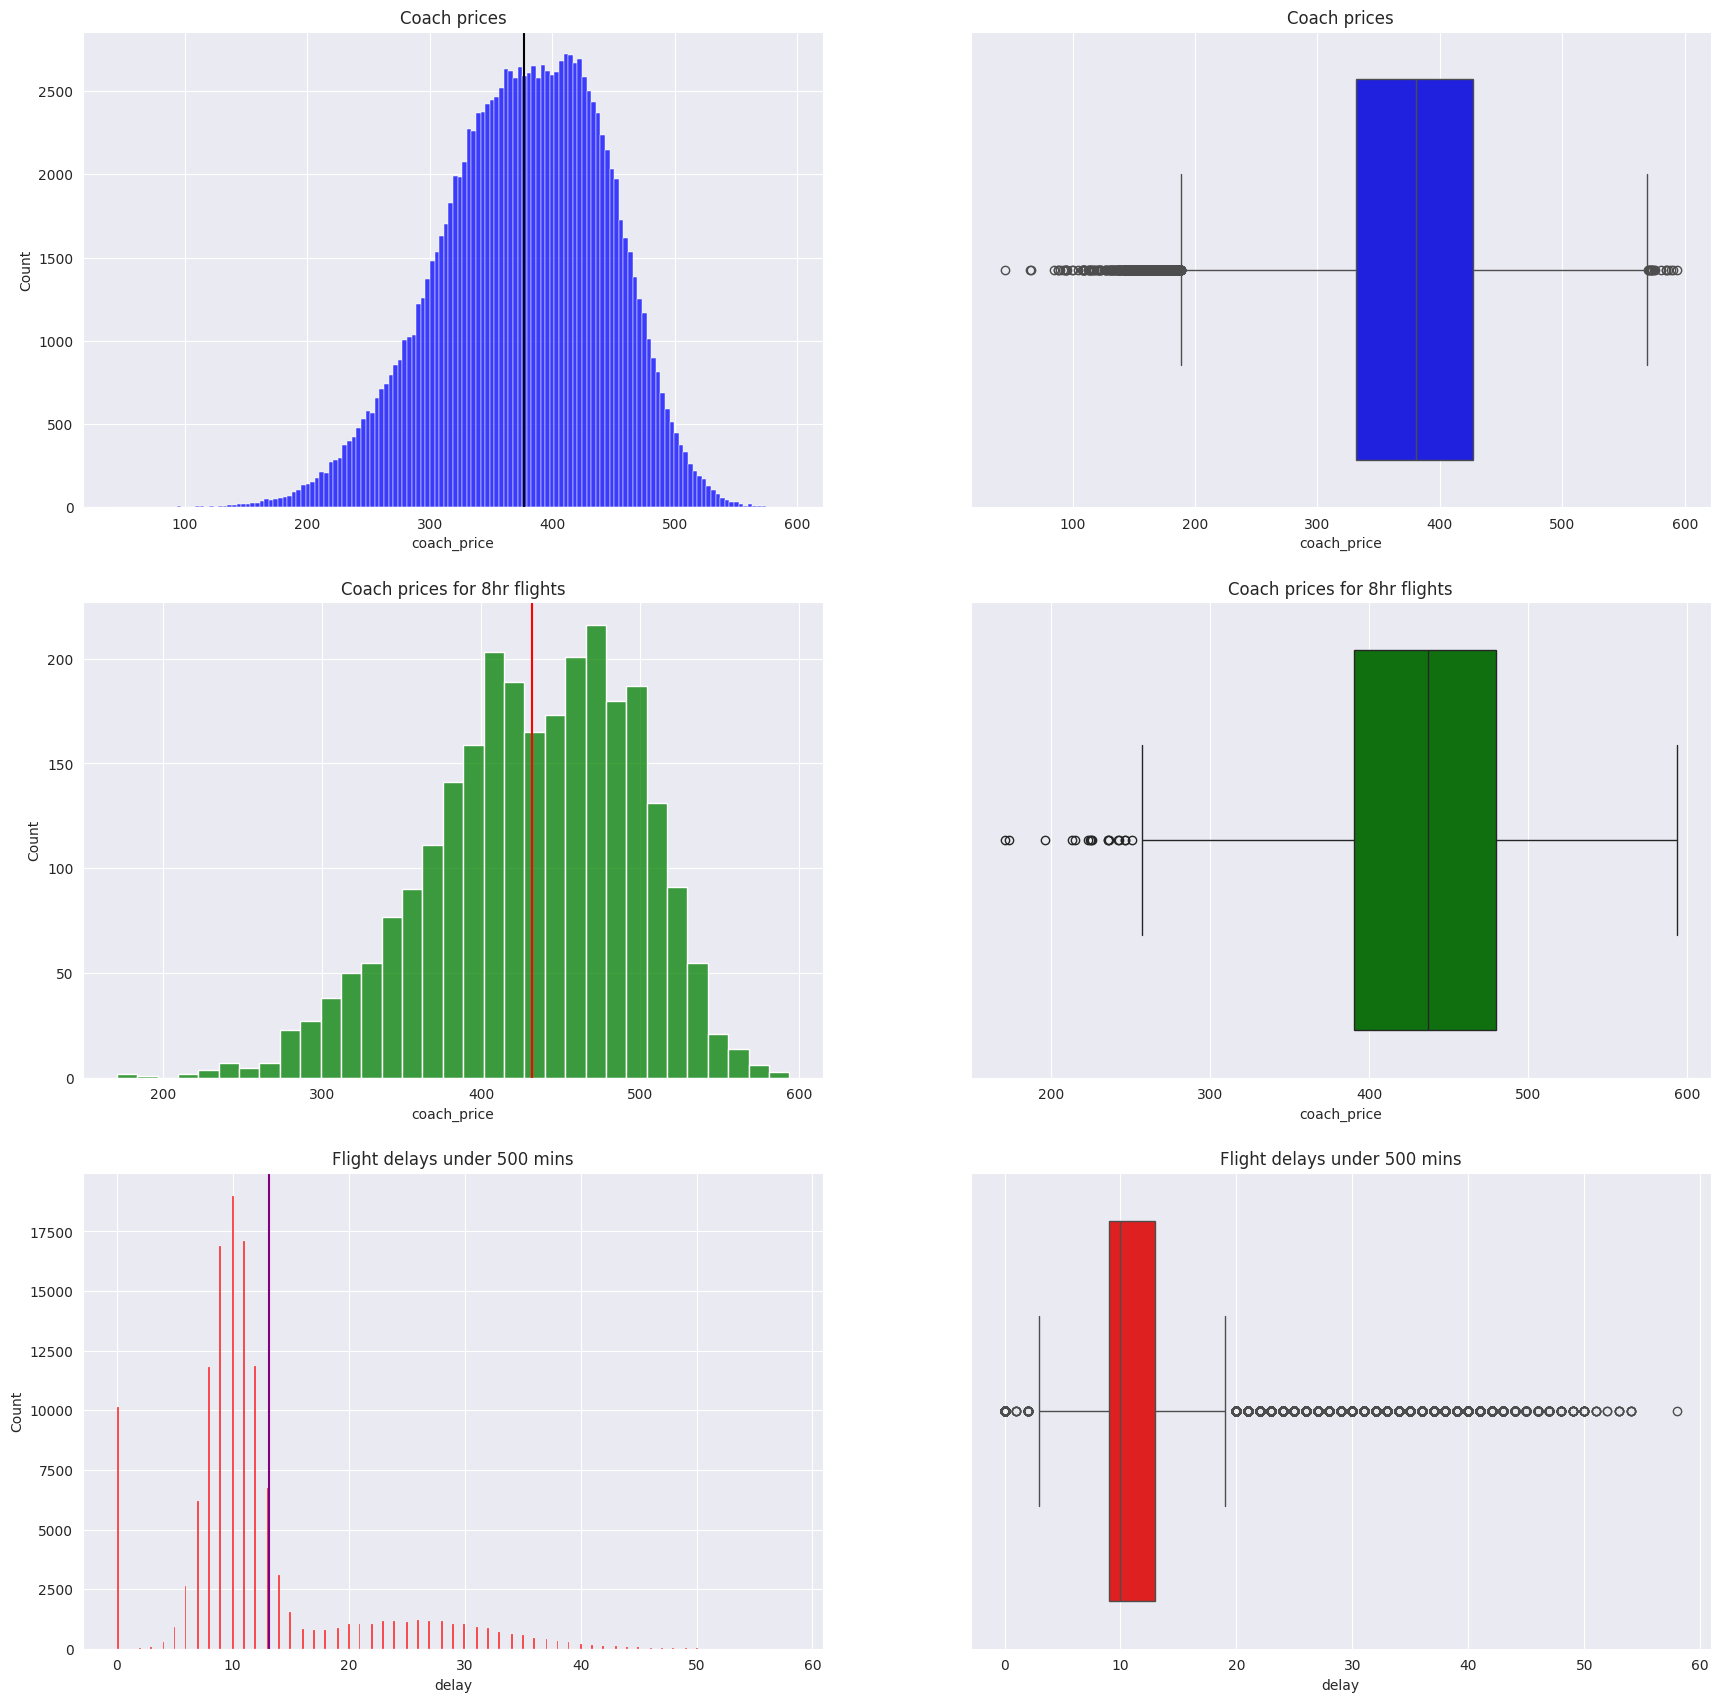

<Figure size 640x480 with 0 Axes>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# set theme to dark grid
sns.set_style('darkgrid')

plt.figure(figsize=(21,21))
#subplot 1: Coach prices
plt.subplot(3,2,1)
sns.histplot(x= flight.coach_price, color = 'blue')
plt.axvline(flight.coach_price.mean(),color='black')
plt.title('Coach prices')

# subplot 2: Box plot for coach prices
plt.subplot(3,2,2)
sns.boxplot(x = flight['coach_price'], color = 'blue')
plt.title('Coach prices')

# Subplot 3: Coach prices for 8hr flights
plt.subplot(3,2,3)
sns.histplot(x = flight.coach_price[flight.hours == 8], color = 'green')
hr_mean = np.mean(flight.coach_price[flight.hours == 8])
plt.axvline(hr_mean,color='red')
plt.title('Coach prices for 8hr flights')

# Subplot 4: Box plot for Coach prices for 8hr long flights
plt.subplot(3,2,4)
sns.boxplot(x = flight.coach_price[flight.hours == 8], color = 'green')
plt.title('Coach prices for 8hr flights')

#subplot 5: Flight delays distribution under 500 mins
plt.subplot(3,2,5)
sns.histplot(x = flight.delay[flight.delay <= 500], color = 'red')
plt.axvline(flight.delay.mean(), color = 'purple')
plt.title('Flight delays under 500 mins')

# Subplot 6: Box plot for flight delays under 500 mins
plt.subplot(3,2,6)
sns.boxplot(x = flight.delay[flight.delay <= 500], color = 'red')
plt.title('Flight delays under 500 mins')

plt.show()
plt.clf()

In [5]:
# 1.The coach prices are normally distributed with the cheapest ticket costing $44.42 and the most expensive being $593.64.
print(f'The mean coach price is ${round(flight.coach_price.mean(),2)}')
# The mean coach price is $376.59

# 2. For 8hr long flights; the mean coach price is $431.83 which is $55.24 higher than the total average price
print(f'The mean coach price for 8hr flights is ${round(flight.coach_price[flight.hours == 8].mean(),2)}')

# 3. From the .describe() results, the maximum flight delay is 1560 mins == 26hrs! This value is an extreme outlier and a cut of point of 500 mins was picked to show other outliers, but not so high to disorient our plot. From the distribution plot, flight delays over 50 mins are not a common phenomena, and the average flight is delayed for 13 mins
print(f'On average,flights are delayed by {round(flight.delay.mean())} mins')

The mean coach price is $376.59
The mean coach price for 8hr flights is $431.83
On average,flights are delayed by 13 mins


## Bivariate Analysis

1. Let's explore the relationship between coach and first-class prices of each flight. Do flights with higher coach prices always have higher first-class prices as well?
   
2. What about the relationship between coach prices and inflight features - inflight mean, entertainment and WiFi? Which features are associated with the highest increase in price?
   
3. How does the number of passengers change in relation to the length of flights?

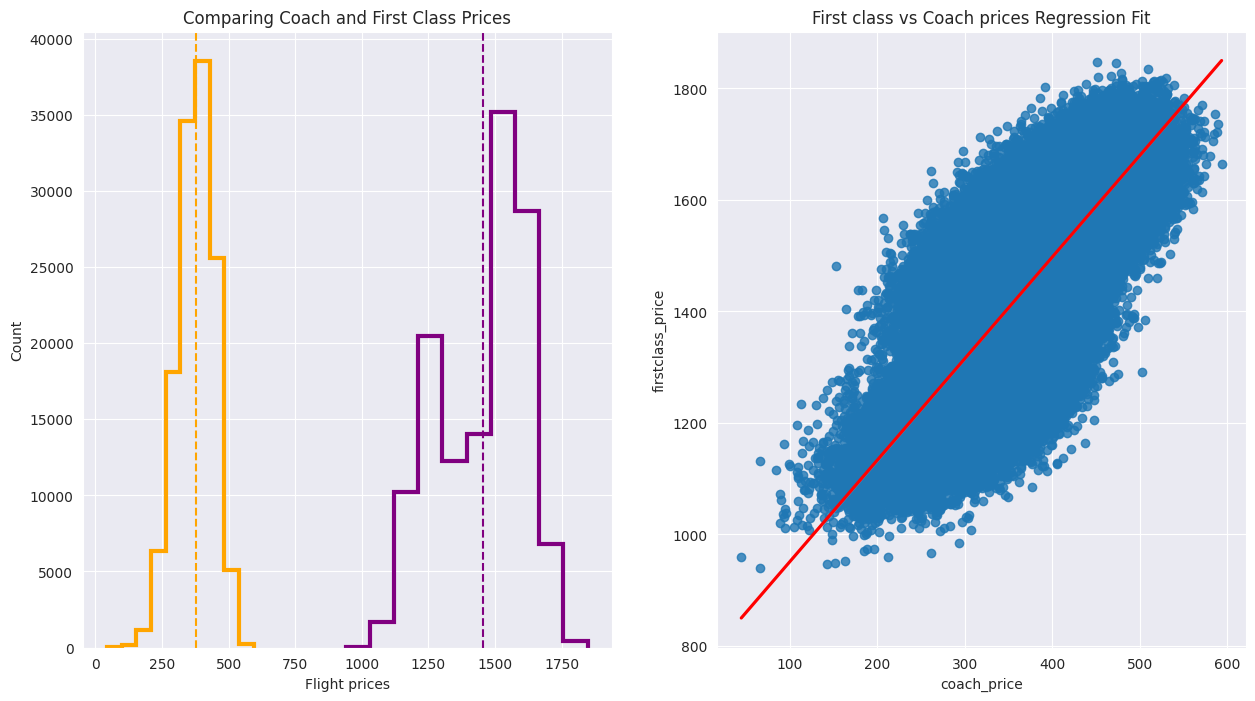

<Figure size 640x480 with 0 Axes>

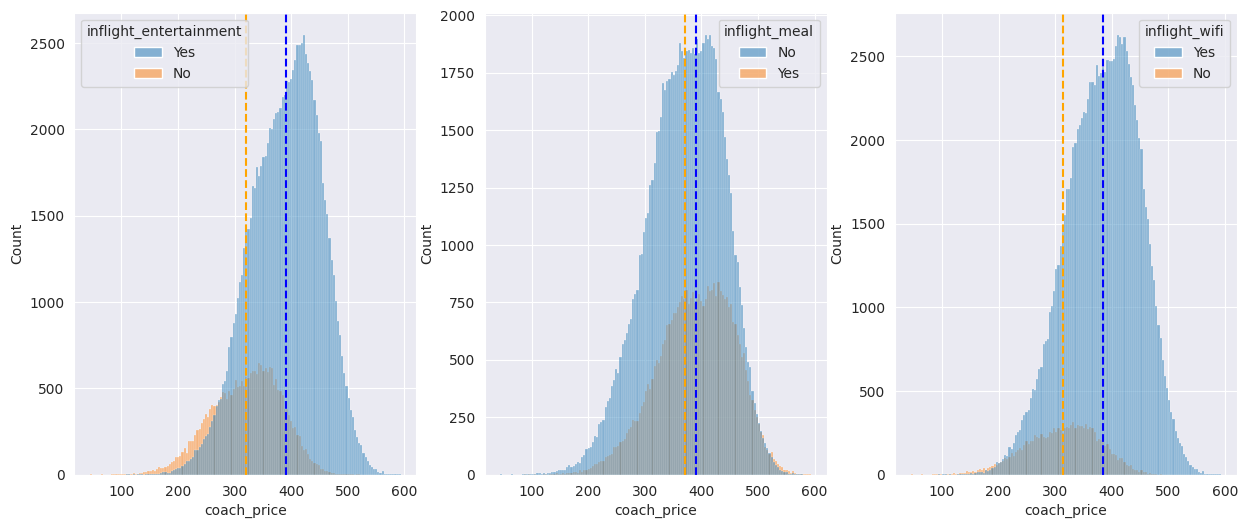

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

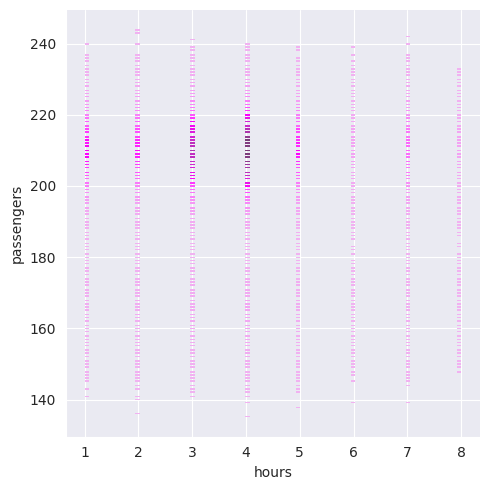

<Figure size 640x480 with 0 Axes>

In [6]:
# set theme
sns.set_style('darkgrid')

# 1. First class prices vs Coach prices
plt.figure(figsize=(15,8))

# Subplot 1. histogram steps
plt.subplot(1,2,1)
plt.hist(data = flight, x='coach_price', color='orange', histtype='step', linewidth =3)
plt.axvline(flight.coach_price.mean(), color = 'orange',linestyle='--')

plt.hist(data = flight, x='firstclass_price', color='purple', histtype='step', linewidth =3)
plt.axvline(flight.firstclass_price.mean(), color = 'purple',linestyle='--')

plt.xlabel('Flight prices')
plt.ylabel('Count')
plt.title('Comparing Coach and First Class Prices')

# Subplot 2. scatter plot with regression fit
plt.subplot(1,2,2)
sns.regplot(data = flight, x= 'coach_price', y= 'firstclass_price', line_kws={'color':'red'})
plt.title('First class vs Coach prices Regression Fit')

plt.show()
plt.clf()

# 2. Coach prices vs inflight features scatter plot with hues for features
plt.figure(figsize=(15,6))

# Subplot 1. Entertainment histogram
plt.subplot(1,3,1)
sns.histplot(data = flight, x=flight.coach_price, hue = 'inflight_entertainment')
plt.axvline(flight.coach_price[flight.inflight_entertainment=='Yes'].mean(), color = 'blue', linestyle='--')
plt.axvline(flight.coach_price[flight.inflight_entertainment=='No'].mean(), color = 'orange', linestyle='--')

# Subplot 2. Meal histogram
plt.subplot(1,3,2)
sns.histplot(data = flight, x=flight.coach_price, hue = 'inflight_meal')
plt.axvline(flight.coach_price[flight.inflight_meal=='Yes'].mean(), color = 'blue', linestyle='--')
plt.axvline(flight.coach_price[flight.inflight_meal=='No'].mean(), color = 'orange', linestyle='--')

# Subplot 3. WiFi histogram
plt.subplot(1,3,3)
sns.histplot(data = flight, x=flight.coach_price, hue = 'inflight_wifi')
plt.axvline(flight.coach_price[flight.inflight_wifi=='Yes'].mean(), color = 'blue', linestyle='--')
plt.axvline(flight.coach_price[flight.inflight_wifi=='No'].mean(), color = 'orange', linestyle='--')

plt.show()
plt.clf()

# 3. Number of passengers vs flight length: kde plot
plt.figure(figsize=(8,8))
sns.displot(data = flight, y = 'passengers', x = 'hours', color='purple')

plt.show()
plt.clf()

The difference in average prices between first-class and coach seats is approximately $1078.35
The correlation between coach and first-class prices is 0.7588
Average coach prices for flights with entertainment cost $70.07 higher than those without
Average coach prices for flights with meals cost $19.31 higher than those without
Average coach prices for flights with WiFi cost $70.47 higher than those without
hours
1    207.839894
2    207.811556
3    207.679265
4    207.677087
5    207.775262
6    207.379937
7    207.787580
8    207.270691
Name: passengers, dtype: float64


<Figure size 800x800 with 0 Axes>

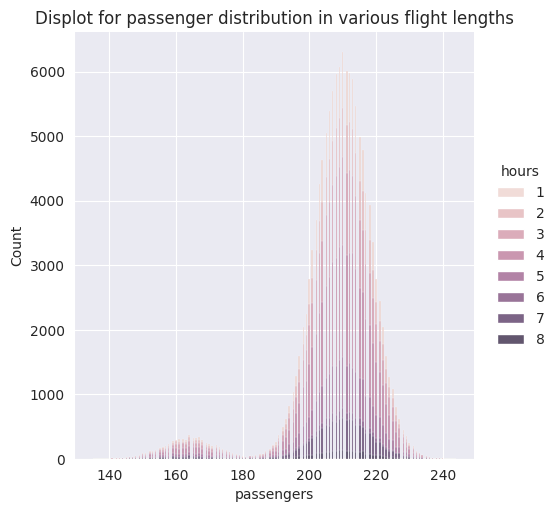

<Figure size 640x480 with 0 Axes>

In [7]:
# Bivariate analysis results

# 1a. Coach vs First Class pricing: 
# The histogram plot reveals that the first class prices are significantly higher compared to the coach prices and both are normally distributed. The difference in average prices between first-class and coach seats is approximately $ 1078.35. We can conclusively state that higher coach prices are generally associated with higher first class prices due to a lack of overlapping of the histograms.

price_diff = flight.firstclass_price.mean() - flight.coach_price.mean()
print(f'The difference in average prices between first-class and coach seats is approximately ${round(price_diff,2)}')

# 1b. Pricing correlations: 
# The scatter plot and linear regression fit reveals a very strong linear positive relationship between the two variables i.e., higher coach price tickets in a flight correspond with higher prices of first-class tickets in that same flight. A pearson correlation value of 0.7588 does indicate a great association between the two variables. However, looking at the bottom left of the scatter plot we see that a higher coach price corresponds to a higher first-class ticket, although this seems to be a very rare case!

from scipy.stats import pearsonr

corr,p = pearsonr(flight.coach_price,flight.firstclass_price)
print(f'The correlation between coach and first-class prices is {round(corr,4)}') # output = 0.7588

# 2a. Coach price variation with In-flight features: Entertainment
ent_price_diff = flight.coach_price[flight.inflight_entertainment =='Yes'].mean() - flight.coach_price[flight.inflight_entertainment == 'No'].mean()
print(f'Average coach prices for flights with entertainment cost ${round(ent_price_diff,2)} higher than those without')

# 2b. Coach price variation with In-flight features: Meal
meal_price_diff = flight.coach_price[flight.inflight_meal=='Yes'].mean() - flight.coach_price[flight.inflight_meal == 'No'].mean()
print(f'Average coach prices for flights with meals cost ${round(meal_price_diff,2)} higher than those without')

# 2c. Coach price variation with In-flight features: WiFi
wifi_price_diff = flight.coach_price[flight.inflight_wifi=='Yes'].mean() - flight.coach_price[flight.inflight_wifi == 'No'].mean()
print(f'Average coach prices for flights with WiFi cost ${round(wifi_price_diff,2)} higher than those without')


# 3. Passenger distribution in various flight lengths
# 3. a. Average number of passengers in different flight durations
passper_flightdur = flight.groupby('hours').passengers.mean()
print( passper_flightdur)

# The mean in this case is a redundant statistic since the distribution is actually bimodal and a single mean is a biased estimator to make accurate conclusions

# 3. b. KDE plot of passengers vs flight duration
# A careful inspection of the KDE plot shows that in all flights i.e., 1hr to 8hr flights; the minimum number of passengers
# is around 140 passengers and spans to a maximum of 240 passengers with a few flights (2hr flights and 7hrs) slightly exceeding this capacity. It would seem 2hr flights and 7hr flights are common flight trip durations and might have overbooking issues.

# 3. c. Closer inspection with DISPLOT
plt.figure(figsize=(8,8))
sns.displot(x=flight.passengers,hue=flight.hours, multiple = 'stack')
plt.title('Displot for passenger distribution in various flight lengths')

plt.show()
plt.clf()

# From the Displot below; a few things can be observed
# As flight duration increases, the count of those flights reduces rapidly, with 1hr flight having the highest count and 8hr   flights being the lowest flight count

# The plot follows a bimodal distribution with  peaks around 165 passengers and 210 passengers for all flight durations. This shows that passenger occupation is not affected by the flight duration. This is generally the case as flights are mostly bound by seat + weight capacity of a plane rather than flight durations. The key factor for varying passengers in  flight hours must therefore be plane size and seating capacity.

## Multivariate Analysis
1. We are going to analyse the relationship between coach and first-class prices on weekends compared to weekdays
2. How do coach prices differ for redeyes vs non-redeyes on each day of the week?

/tmp/ipykernel_9420/2978432266.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.violinplot(data = flight, y = 'redeye', x = 'coach_price', hue='weekend', split = True , color='green')


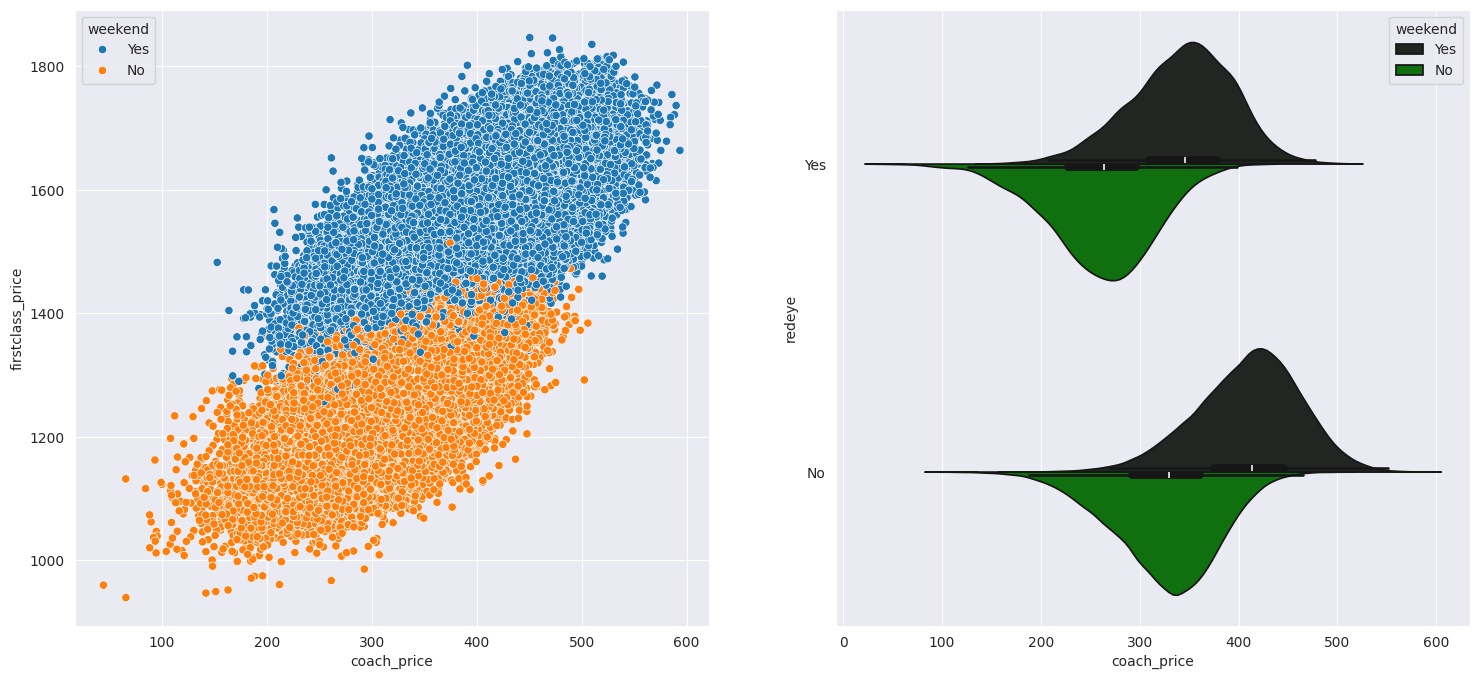

/tmp/ipykernel_9420/2978432266.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:turquoise'` for the same effect.

  sns.violinplot(data = flight, y = 'coach_price', x = 'day_of_week', hue='redeye', split = True , color='turquoise')


<Figure size 640x480 with 0 Axes>

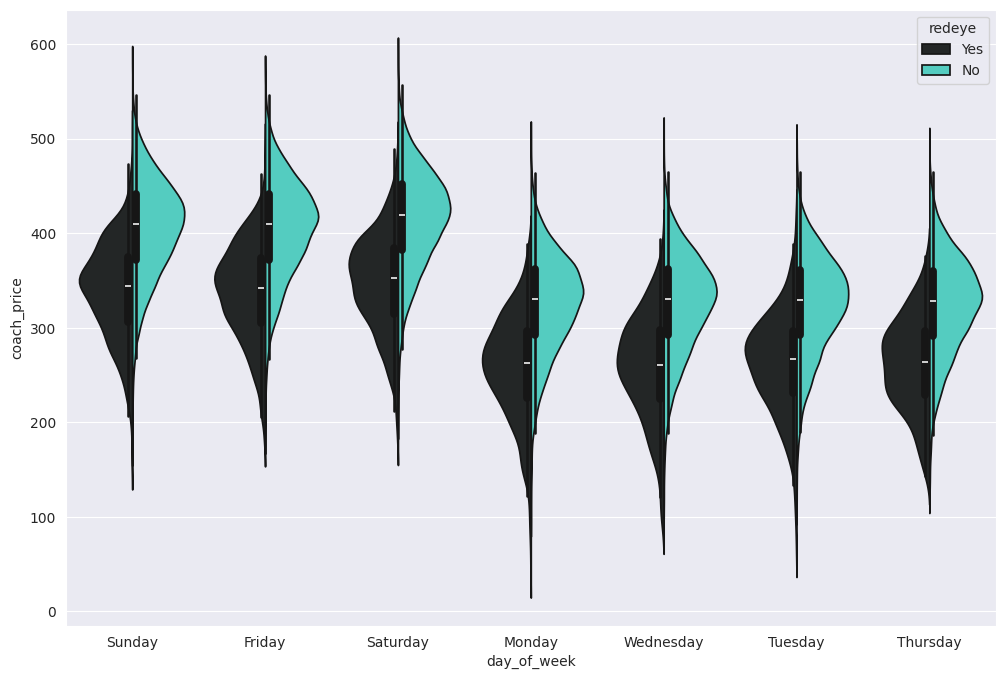

<Figure size 640x480 with 0 Axes>

In [8]:
# coach prices vs first-class on weekends vs weekdays
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.scatterplot(data = flight, y = 'firstclass_price', x = 'coach_price', hue='weekend')

plt.subplot(1,2,2)
sns.violinplot(data = flight, y = 'redeye', x = 'coach_price', hue='weekend', split = True , color='green')
plt.show()
plt.clf()

# coach prices variation in overnight flights over the week
plt.figure(figsize=(12,8))
sns.violinplot(data = flight, y = 'coach_price', x = 'day_of_week', hue='redeye', split = True , color='turquoise')
plt.show()
plt.clf()

In [9]:
# Multivariate analysis

# 1. Coach pricers vs First class prices on Weekdays vs on Weekends
# The Scatter plot: reveals higher prices for both coach and first class prices on the weekend compared to the weekday as marked by the higher values in blue dots.


# Violin Plot for Redeye(Overnight) flights on the weekends vs weekdays:
# The Coach pricing for flights without ovenight connections, bottom violin plot, reveal an evident higher prices on the weekend vs weekdays due to the lag in peaks of the violion plot

# For flights Not on the weekends: In green
# The redeye flights have a peak that is lags behind non-redeye flights, signifying cheaper prices in overnight flights!


# 2. Redeye vs Non-redeye on all days of the week
# On each day of the week the prices for redeye flights are averagely cheaper than non-redeye flights, with Monday having the lowest prices for redeye flights!